# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten 

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [3]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'archive.rar', 'MNIST Dataset using CNN.ipynb', 'sample_submission.csv', 'test.csv', 'train.csv']


# Loading Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [5]:
print(f"traing data size{train.shape}\n testing data size{test.shape}")

traing data size(42000, 785)
 testing data size(28000, 784)


In [6]:
X = train.drop(['label'], 1).values
y = train['label'].values

C:\Users\user\AppData\Local\Temp\ipykernel_15380\2430759019.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop(['label'], 1).values


# Reshape The Data

In [7]:
X = X / 255.0

In [8]:
X = X.reshape(-1,28,28,1)

In [9]:
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

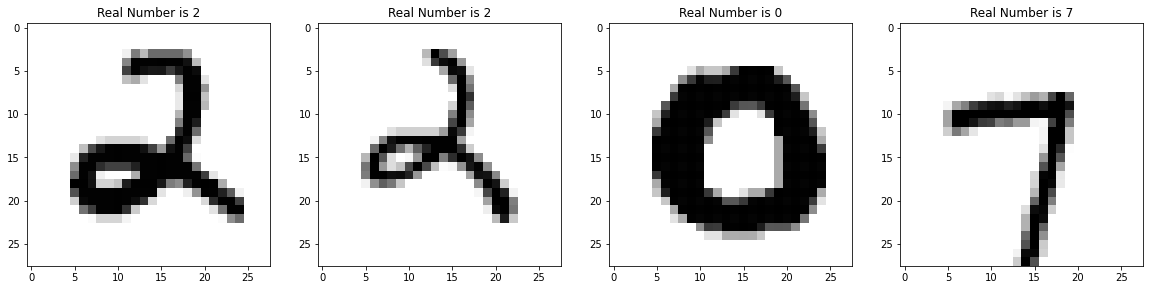

In [12]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [13]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

# Model

In [14]:
model=Sequential()
 
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)        0

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=15,  
        zoom_range = 0.01, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

In [18]:
epochs = 10
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", 
        patience=10, 
        verbose=1,
        mode="max", 
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [19]:
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps, 
                              callbacks=[es, rp])

Epoch 1/10


C:\Users\user\AppData\Local\Temp\ipykernel_15380\3085895664.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


295/295 [==============================] - 27s 89ms/step - loss: 0.5360 - accuracy: 0.8241 - val_loss: 0.2159 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 2/10
295/295 [==============================] - 27s 90ms/step - loss: 0.1834 - accuracy: 0.9414 - val_loss: 0.1411 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 3/10
295/295 [==============================] - 27s 90ms/step - loss: 0.1349 - accuracy: 0.9582 - val_loss: 0.1159 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 4/10
295/295 [==============================] - 27s 91ms/step - loss: 0.1155 - accuracy: 0.9632 - val_loss: 0.1038 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 5/10
295/295 [==============================] - 27s 91ms/step - loss: 0.0996 - accuracy: 0.9684 - val_loss: 0.0936 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 6/10
295/295 [==============================] - 27s 92ms/step - loss: 0.0889 - accuracy: 0.9718 - val_loss: 0.0968 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 7/10
295/295 [==============================] - 26s 90ms/step -

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Confusion Matrix

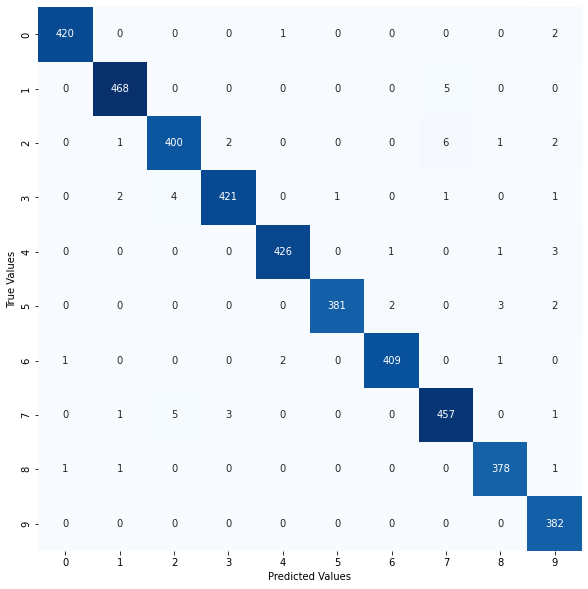

In [22]:
fig = plt.figure(figsize=(10, 10)) 

y_pred = model.predict(X_test)

Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# Prediction

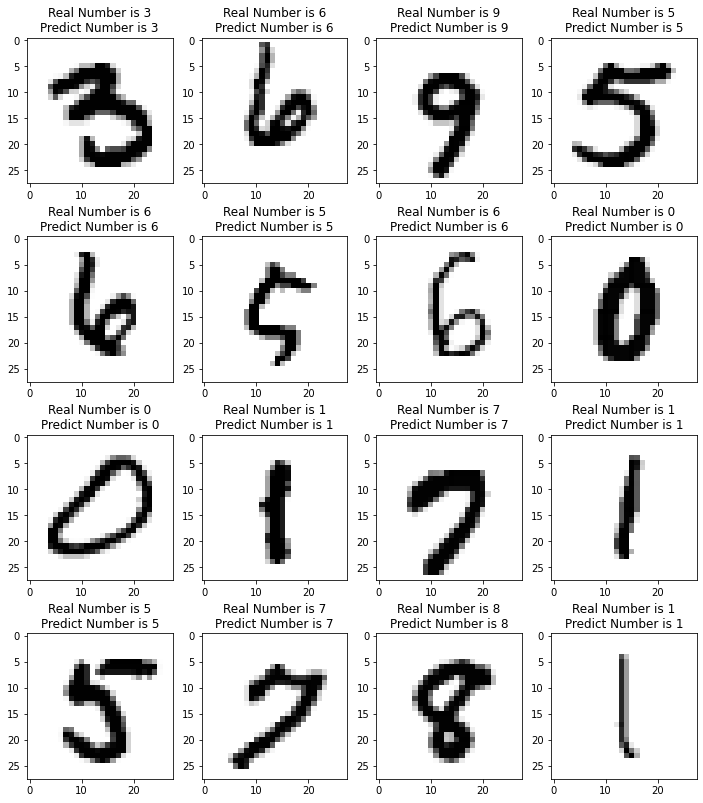

In [23]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");